![maf](../images/maf.png)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from flows import *
from utl import *
from load_data import *

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tensorflow.compat.v1 import logging
logging.set_verbosity(logging.ERROR)

In [2]:
DTYPE=tf.float32
NP_DTYPE=np.float32
num_bijectors = 4
n_epochs = 1000
lr = 1e-3

In [3]:
X_data = load_moon_dataset()

(-2.0, 2.0)

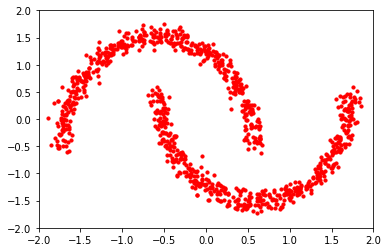

In [4]:
xlim, ylim = [-2, 2], [-2, 2]
plt.scatter(X_data[:, 0], X_data[:, 1], s=10, color='red')
plt.xlim(xlim)
plt.ylim(ylim)

In [5]:
base_dist = tfd.MultivariateNormalDiag(loc=tf.zeros([2], tf.float32), scale_diag=tf.ones([2], tf.float32))

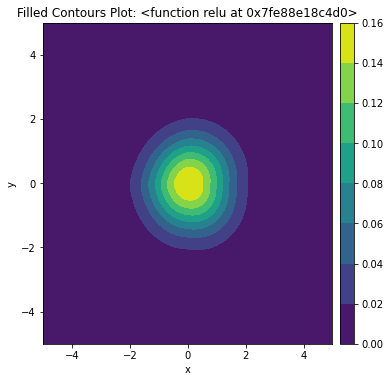

In [6]:
activation = tf.nn.relu
maf = MAF(base_dist, num_bijectors, hidden_units=[256, 256], activation=activation)
plot_contour_prob([maf], scale_fig=6, title=[activation])

In [8]:
# Make samples
names, samples = make_samples(base_dist, maf)

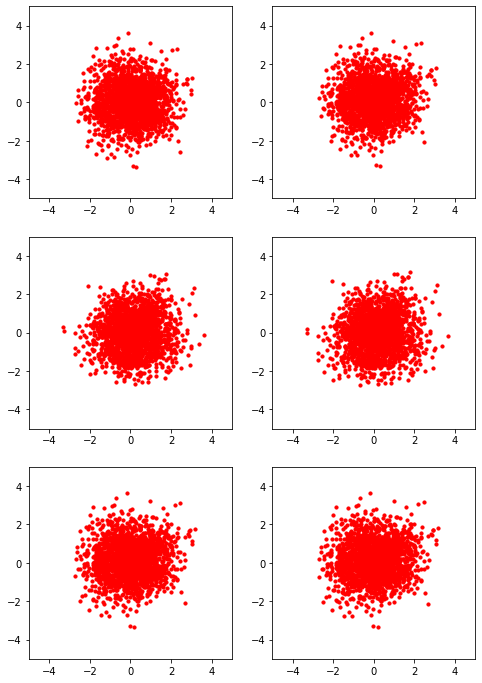

In [9]:
plot_samples(samples, names, rows=3)

# Training a MAF Bijector

In [10]:
history = train_dist_routine(X_data, maf, n_epochs=n_epochs, n_disp=int(n_epochs/50))


 Epoch 1/1000 
	 loss: 2.8572, val_loss: 2.6747

 Epoch 21/1000 
	 loss: 2.3852, val_loss: 2.3814

 Epoch 41/1000 
	 loss: 2.2901, val_loss: 2.2908

 Epoch 61/1000 
	 loss: 2.0431, val_loss: 2.0844

 Epoch 81/1000 
	 loss: 1.9359, val_loss: 1.9747

 Epoch 101/1000 
	 loss: 1.9146, val_loss: 1.9390

 Epoch 121/1000 
	 loss: 1.8765, val_loss: 1.9307

 Epoch 141/1000 
	 loss: 1.8155, val_loss: 1.9264

 Epoch 161/1000 
	 loss: 1.7546, val_loss: 1.8519

 Epoch 181/1000 
	 loss: 1.7352, val_loss: 1.9541

 Epoch 201/1000 
	 loss: 2.1594, val_loss: 12.8304

 Epoch 221/1000 
	 loss: 2.8863, val_loss: 2.8846

 Epoch 241/1000 
	 loss: 2.4151, val_loss: 2.4643

 Epoch 261/1000 
	 loss: 2.2047, val_loss: 2.2673

 Epoch 281/1000 
	 loss: 2.0214, val_loss: 2.0969

 Epoch 301/1000 
	 loss: 1.8311, val_loss: 1.9446

 Epoch 321/1000 
	 loss: 1.7130, val_loss: 1.8441

 Epoch 341/1000 
	 loss: 1.6416, val_loss: 1.7828

 Epoch 361/1000 
	 loss: 1.5871, val_loss: 1.7193

 Epoch 381/1000 
	 loss: 1.5500, va

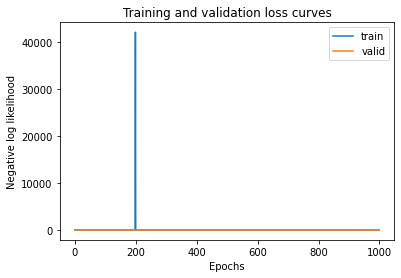

In [11]:
plot_loss(history)

In [12]:
# Make samples
names, samples = make_samples(base_dist, maf)

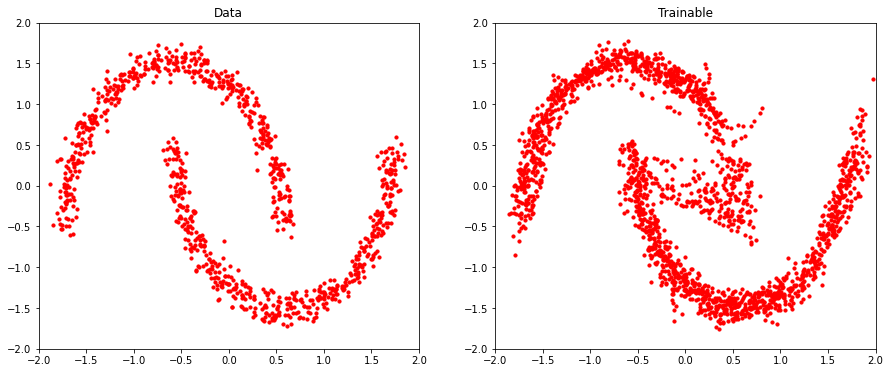

In [13]:
visualize_training_data(X_data, samples)

In [14]:
plot_contour_prob([maf], scale_fig=6)